In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns
import os
import random
import re
import shutil
from collections import defaultdict
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
# import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.models import load_model
from tensorflow.keras.applications import VGG19
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

In [2]:
dir = r"ruta a la carpeta de imágenes"
os.listdir(dir)

['SG alta', 'SG baja', 'test', 'train', 'val']

In [3]:
train_path = dir + '/train/'
test_path = dir + '/test/'
validation_path = dir + '/val/'
print("train path:", train_path)
print("test path:", test_path)
print("validation path:", validation_path)

train path: C:\Users\alvar\Desktop\Bioinfor y Bioest\TFM\Base de datos Glioblastoma UPENN\Imagenes_CNN\SG/train/
test path: C:\Users\alvar\Desktop\Bioinfor y Bioest\TFM\Base de datos Glioblastoma UPENN\Imagenes_CNN\SG/test/
validation path: C:\Users\alvar\Desktop\Bioinfor y Bioest\TFM\Base de datos Glioblastoma UPENN\Imagenes_CNN\SG/val/


In [6]:
os.listdir(test_path)

['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

In [4]:
image_generator = ImageDataGenerator(rescale = 1./255.,
                                     rotation_range=20,
                                     width_shift_range=0.1,
                                     height_shift_range=0.1,
                                     zoom_range=0.1,
                                     horizontal_flip=True)

In [5]:
image_generator.flow_from_directory(train_path)

Found 985 images belonging to 2 classes.


In [6]:
image_generator.flow_from_directory(test_path)

Found 413 images belonging to 2 classes.


In [7]:
image_generator.flow_from_directory(validation_path)

Found 245 images belonging to 2 classes.


In [ ]:
## Modelo VGG19

In [8]:
VGG19_model = VGG19(
                    include_top=False,
                    weights='imagenet',
                    input_shape=(240,240,3),
                    pooling='max',
                    classes= 2
                )

for layer in VGG19_model.layers:
    layer.trainable = False

In [9]:
model_class_1 = Sequential([
    VGG19_model,
    Dense(2560,activation='relu'),
    BatchNormalization(),
    Dense(1280, activation='relu'),
    BatchNormalization(),
    Dense(1024, activation='relu'),
    Dense(2, activation='softmax')
])

In [10]:
model_class_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 512)               20024384  
                                                                 
 dense (Dense)               (None, 2560)              1313280   
                                                                 
 batch_normalization (BatchN  (None, 2560)             10240     
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 1280)              3278080   
                                                                 
 batch_normalization_1 (Batc  (None, 1280)             5120      
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 1024)              1

In [16]:
model_class_1.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=5e-04) ,loss = 'sparse_categorical_crossentropy',metrics = 'accuracy')

In [12]:
batch_size = 32

In [13]:
train_image_generator = image_generator.flow_from_directory(train_path,
                                                            target_size=(240, 240),
                                                            color_mode='rgb',
                                                            batch_size=batch_size,
                                                            class_mode='binary')

Found 985 images belonging to 2 classes.


In [14]:
validation_image_generator = image_generator.flow_from_directory(validation_path,
                                                            target_size=(240, 240),
                                                            color_mode='rgb',
                                                            batch_size=batch_size,
                                                            class_mode='binary')

Found 245 images belonging to 2 classes.


In [15]:
test_image_generator = image_generator.flow_from_directory(test_path,
                                                            target_size=(240, 240),
                                                            color_mode='rgb',
                                                            batch_size=batch_size,
                                                            class_mode='binary',
                                                            shuffle = False)

Found 413 images belonging to 2 classes.


In [17]:
history = model_class_1.fit(train_image_generator, validation_data=validation_image_generator, epochs=30)

Epoch 1/30
31/31 [==============================] - 119s 4s/step - loss: 1.2816 - accuracy: 0.5756 - val_loss: 0.6386 - val_accuracy: 0.6204
Epoch 2/30
31/31 [==============================] - 126s 4s/step - loss: 0.9386 - accuracy: 0.6386 - val_loss: 0.6231 - val_accuracy: 0.6776
Epoch 3/30
31/31 [==============================] - 155s 5s/step - loss: 0.7981 - accuracy: 0.6914 - val_loss: 0.6622 - val_accuracy: 0.6082
Epoch 4/30
31/31 [==============================] - 129s 4s/step - loss: 0.6399 - accuracy: 0.7025 - val_loss: 0.7874 - val_accuracy: 0.4531
Epoch 5/30
31/31 [==============================] - 136s 4s/step - loss: 0.5833 - accuracy: 0.7452 - val_loss: 0.6353 - val_accuracy: 0.6531
Epoch 6/30
31/31 [==============================] - 157s 5s/step - loss: 0.5320 - accuracy: 0.7523 - val_loss: 0.6482 - val_accuracy: 0.6571
Epoch 7/30
31/31 [==============================] - 125s 4s/step - loss: 0.4906 - accuracy: 0.7888 - val_loss: 0.7427 - val_accuracy: 0.5429
Epoch 8/30
31

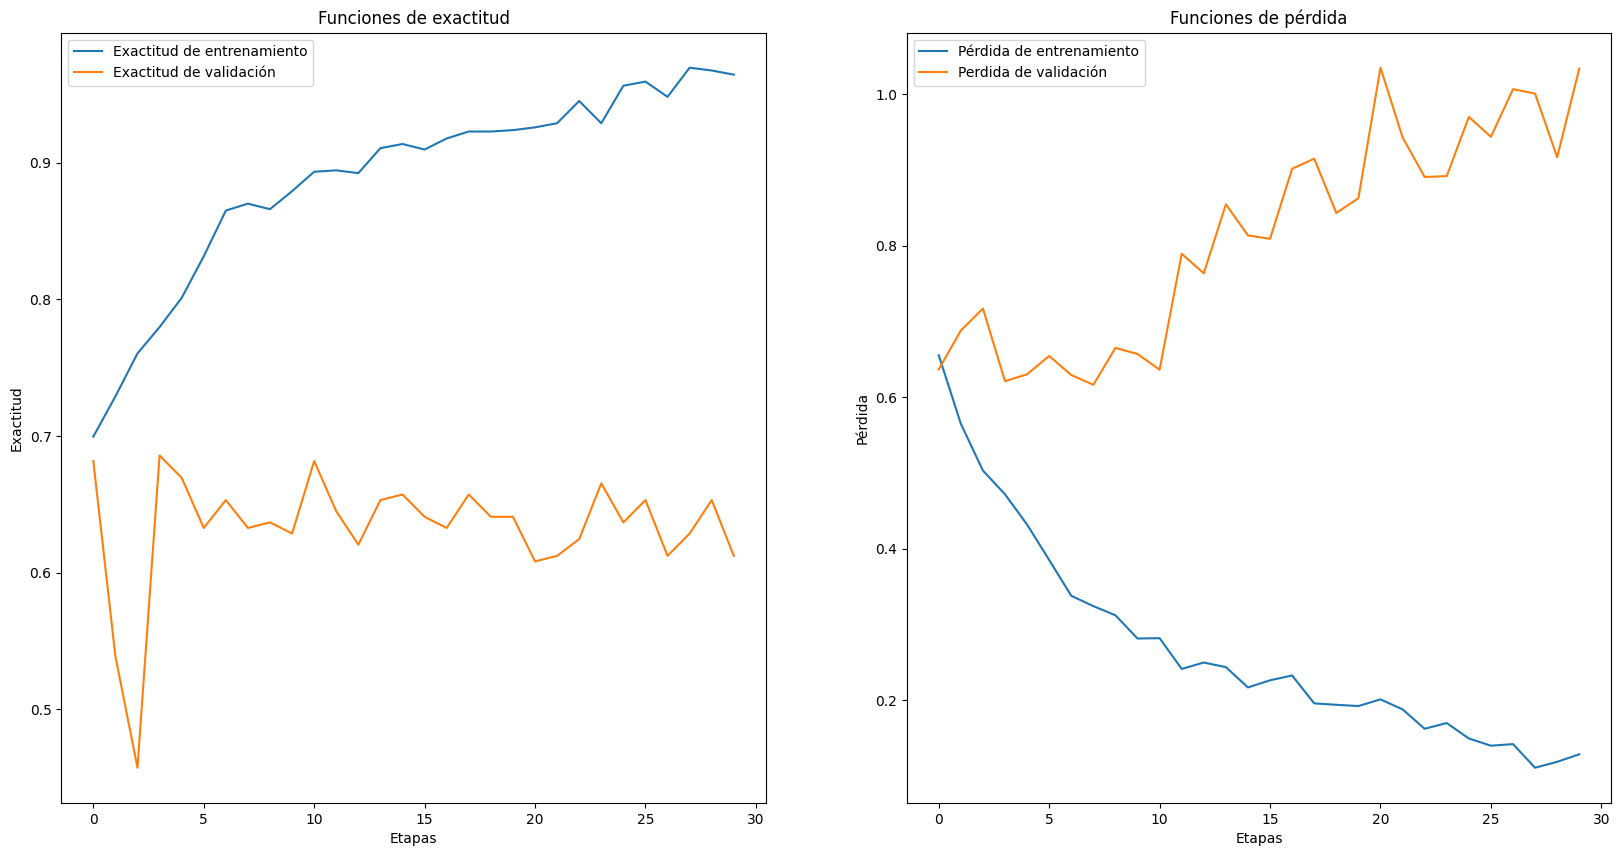

In [60]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20,10))

ax[0].plot(acc, label = 'Exactitud de entrenamiento')
ax[0].plot(val_acc, label = 'Exactitud de validación')
ax[0].set_xlabel('Etapas')
ax[0].set_ylabel('Exactitud')
ax[0].set_title('Funciones de exactitud')
ax[0].legend()


ax[1].plot(loss, label = 'Pérdida de entrenamiento')
ax[1].plot(val_loss, label = 'Perdida de validación')
ax[1].set_xlabel('Etapas')
ax[1].set_ylabel('Pérdida')
ax[1].set_title('Funciones de pérdida')
ax[1].legend()

In [48]:
# Predicción sobre los datos de prueba
y_pred_probs = model_class_1.predict(test_image_generator, steps=len(test_image_generator), verbose=1)

# Convertir probabilidades en clases predichas (índices)
y_pred = np.argmax(y_pred_probs, axis=1)
print(y_pred)
# Extraer las etiquetas reales desde el generador
y_true = test_image_generator.classes
print(y_true)

13/13 [==============================] - 36s 3s/step
[1 0 1 1 0 0 0 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 0 0 1 1 0 1 0 1 0 1 0 0 1 1 0
 0 1 1 1 1 0 1 0 0 0 0 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 0 0
 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 0 1 0 1 1 0 1 1 1 1 0 1 0 1 0 0 0 1 1 1 0 1
 0 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 1 1 0 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 0 0 1 1 0 1 1 1 0 1 1
 1 0 1 1 0 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1
 1 1 0 0 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 1 1 0 1 1 1 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0
 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 0 0 1 1 0 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [50]:
print(y_pred_probs.shape)

(413, 2)


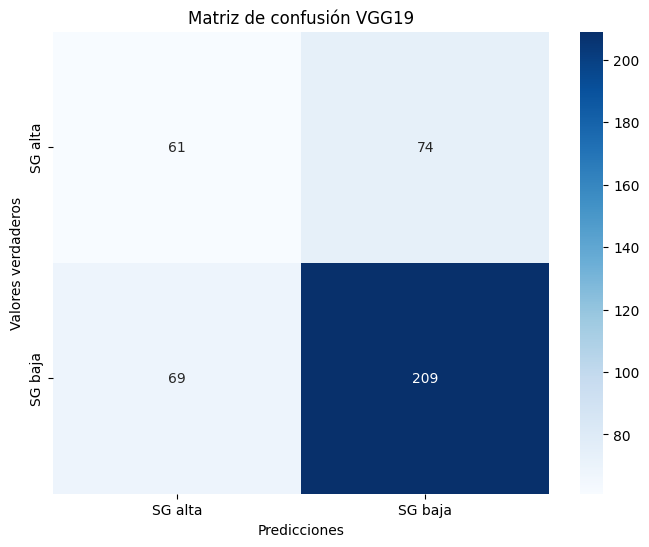

              precision    recall  f1-score   support

     SG alta       0.47      0.45      0.46       135
     SG baja       0.74      0.75      0.75       278

    accuracy                           0.65       413
   macro avg       0.60      0.60      0.60       413
weighted avg       0.65      0.65      0.65       413



In [61]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular matriz de confusión
conf_matrix = confusion_matrix(y_true, y_pred)

# Mostrar la matriz de confusión como un mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["SG alta", "SG baja"], yticklabels=["SG alta", "SG baja"])
plt.xlabel("Predicciones")
plt.ylabel("Valores verdaderos")
plt.title("Matriz de confusión VGG19")
plt.show()

# Imprimir un reporte de clasificación
report = classification_report(y_true, y_pred, target_names=["SG alta", "SG baja"])
print(report)

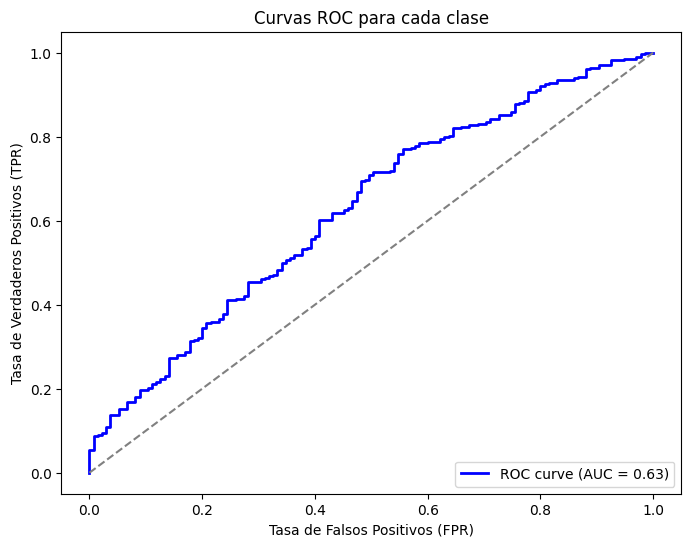

In [62]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calcular la curva ROC para la clase positiva
fpr, tpr, _ = roc_curve(y_true, y_pred_probs[:, 1])  # Usamos la columna de la clase 1
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curvas ROC para cada clase')
plt.legend(loc='lower right')
plt.show()